# Letter Counter - Contador de letras


Un pequeño notebook para contar la frecuencia de las letras en el castellano (o en cualquier idioma, siempre que le pases la lista de letras en un CSV).

Esto que estas leyendo, es un Jupyter notebook. Puedes utilizarlo como documeto, o como herramienta ejecutable (y que permite modificaciones de forma interactiva). Para saber mas sobre como ejecutarlo, mira la documentacion en [jupyter.org](https://jupyter.org/) y revisa el Makefile.


### Loading Internal Assets

You can ignore this part.


In [1]:
import unidecode
from collections import defaultdict

# Loading libraries
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


# Load jupyter notify
# See https://github.com/shoprunner/jupyter-notify
%load_ext jupyternotify



<IPython.core.display.Javascript object>

In [2]:
%%notify -o

pass

<IPython.core.display.Javascript object>

### Configuration - Configuracion

If you want to change settings, like data sources.

---

Si necesitas cambiar configuracion, como los acentos o la fuente de datos.

In [3]:

# Distinguish accent (True = i and í are 2 different letters; False = they are 2 letter i's)
accent_dif = False # False to ignore, as we won't be using them either for the exercises.

# Data sources
wordlist_fileSHORT = r'../data/Anexo I - palabras 3-9 letras.xls'
wordlist_fileLONG = r'../data/Anexo II - palabras 10-16 letras.xls'


### Statistics - Estidisticas

Restart the counters

---

Reinicia los contadores

In [4]:
## Clear Up the statistics

## GLOBAL Variables
# total of words counted
word_sum = 0
# Freq of each letter
letter_frequency = defaultdict(lambda:0)
# Percentile of each letter's frequency
letter_freq_percent = defaultdict(lambda:0)
 

## Obtain list of usable words from 5 to 6 letters

Using pandas and matplotlib.

--- 

Utilizando pandas y matplotlib.



In [ ]:
# SKIP Obtain the list of words from the original database
## SLOW Run carefully.

#load the sheets for 5 and 6 letters words as Pandas DataFrames
words5letters = pd.read_excel (wordlist_fileSHORT, sheet_name="5", verbose=True)
words6letters = pd.read_excel (wordlist_fileSHORT, sheet_name="6", verbose=True)

# Extract only the words and the lexyc frequency of words
w5l = pd.DataFrame(words5letters , columns=["PALABRA", "FRECUENC"])
w6l = pd.DataFrame(words6letters , columns=["PALABRA", "FRECUENC"])
w6l

In [22]:
# TMP DUPLICATED ; Trying to figure out the issues with missing words.
# SKIP Obtain the list of words from the original database
## SLOW Run carefully.

#load the sheets for 5 and 6 letters words as Pandas DataFrames
words5letters = pd.read_excel (wordlist_fileSHORT, sheet_name="5", verbose=True, dtype=object)

# Extract only the words and the lexyc frequency of words
w5l = pd.DataFrame(words5letters ,columns=["PALABRA","FRECUENC"])
w6l = pd.DataFrame(words6letters , columns=["PALABRA", "FRECUENC"])
w6l

Reading sheet 5


,PALABRA,FRECUENC
0,ababol,0
1,abacal,0
2,abadía,3
3,abajar,0
4,abalar,0
...,...,...
9500,zurrir,0
9501,zurrón,1
9502,zurubí,0
9503,zutana,0


In [ ]:
# TMP;
# experimentando con dtypes para resolvel el NaN problem ()

### Counting the letters into the frequency database 

To build the statistics about how frequent each letter is.

In [5]:
## Obtain the full database (old way)
## SLOW Run carefully.

#load the sheets for 5 and 6 letters words as Pandas DataFrames
all_words = pd.DataFrame(columns=["PALABRA","FRECUENC"])


for i in range(3,10): # range from 3 to 9, inclusive
    # wordlist_fileSHORT
    sheety = pd.read_excel (wordlist_fileSHORT, sheet_name=f"{i}", verbose=True)
    print(f"Words in {i} ", len(sheety))
    all_words = all_words.append( pd.DataFrame(sheety ,columns=["PALABRA","FRECUENC"]), ignore_index=True )
for i in range(10,17): # range from 10 to 16, inclusive
    # wordlist_fileLONG
    sheety = pd.read_excel (wordlist_fileLONG, sheet_name=f"{i}", verbose=True)
    print(f"Words in {i} ", len(sheety))
    all_words = all_words.append(pd.DataFrame(sheety ,columns=["PALABRA","FRECUENC"]), ignore_index=True )



all_words


Reading sheet 3
Words in 3  392
Reading sheet 4
Words in 4  1914
Reading sheet 5
Words in 5  5126
Reading sheet 6
Words in 6  9505
Reading sheet 7
Words in 7  13618
Reading sheet 8
Words in 8  15792
Reading sheet 9
Words in 9  15428
Reading sheet 10
Words in 10  12635
Reading sheet 11
Words in 11  8861
Reading sheet 12
Words in 12  5528
Reading sheet 13
Words in 13  3312
Reading sheet 14
Words in 14  1798
Reading sheet 15
Words in 15  1010
Reading sheet 16
Words in 16  464


,PALABRA,FRECUENC
0,aba,0
1,aca,0
2,acá,46
3,adó,0
4,afé,0
...,...,...
95378,ultramicroscopio,0
95379,ventriculografía,0
95380,vertiginosamente,2
95381,vicealmirantazgo,0


In [56]:
## TMP; Debug Obtain the full database with Nans, using csv
## SLOW Run carefully.

#load the sheets for 5 and 6 letters words as Pandas DataFrames
csv_words = pd.DataFrame(columns=["PALABRA","FRECUENC"])
import numpy as np
filen_tmpl = r'../data/csv/BD_Palabras_v2-letras_{0:02d}.csv'

for i in range(3,17): # range from 3 to 9, inclusive
    # For each CSV file on the folder, read it into sheety
    filename = filen_tmpl.format(i)
    print(filename)
    sheety = pd.read_csv (filename, verbose=False, dtype={"PALABRA":"str","FRECUENC":np.int32}, engine="python")
    print(f"Words in {i} ", len(sheety))
    csv_words = csv_words.append(pd.DataFrame(sheety, columns=["PALABRA","FRECUENC"]), ignore_index=True )



csv_words


../data/csv/BD_Palabras_v2-letras_03.csv
Words in 3  392
../data/csv/BD_Palabras_v2-letras_04.csv
Words in 4  1914
../data/csv/BD_Palabras_v2-letras_05.csv
Words in 5  5126
../data/csv/BD_Palabras_v2-letras_06.csv
Words in 6  9505
../data/csv/BD_Palabras_v2-letras_07.csv
Words in 7  13618
../data/csv/BD_Palabras_v2-letras_08.csv
Words in 8  15792
../data/csv/BD_Palabras_v2-letras_09.csv
Words in 9  15428
../data/csv/BD_Palabras_v2-letras_10.csv
Words in 10  12635
../data/csv/BD_Palabras_v2-letras_11.csv
Words in 11  8861
../data/csv/BD_Palabras_v2-letras_12.csv
Words in 12  5528
../data/csv/BD_Palabras_v2-letras_13.csv
Words in 13  3312
../data/csv/BD_Palabras_v2-letras_14.csv
Words in 14  1798
../data/csv/BD_Palabras_v2-letras_15.csv
Words in 15  1010
../data/csv/BD_Palabras_v2-letras_16.csv
Words in 16  464


,PALABRA,FRECUENC
0,aba,0
1,aca,0
2,acá,46
3,adó,0
4,afé,0
...,...,...
95378,ultramicroscopio,0
95379,ventriculografía,0
95380,vertiginosamente,2
95381,vicealmirantazgo,0


In [39]:
palabras = csv_words["PALABRA"]
perdidas = all_words.query("PALABRA not in @palabras")

savefile = r'../data/BD_Palabras_Perdidas.csv'
perdidas.to_csv(savefile,sep=",",columns=["PALABRA","FRECUENC"], encoding="utf-8",float_format="0")

perdidas

,PALABRA,FRECUENC


In [57]:
# TMP 
# Saving to a csv to see differences
csv_words.to_csv("all_csv.csv",sep=",",columns=["PALABRA","FRECUENC"], encoding="utf-8",float_format='%.0f')
all_words.to_csv("all_xls.csv",sep=",",columns=["PALABRA","FRECUENC"], encoding="utf-8",float_format='%.0f')

In [8]:
## Count the word into the stats D
## WARNING: Modifies state (word count)

def is_vowel(letter):
    """ returt if it's a vowel """
    return unidecode.unidecode(letter) in "aeiou"

def no_accent(letter):
    """ turn a letter into the no accent equivalent"""
    return unidecode.unidecode(letter) 

assert is_vowel("a") == True
assert is_vowel("á") == True
assert is_vowel("v") == False


assert no_accent("a") == "a"
assert no_accent("á") == "a"
assert no_accent("v") == "v"
    
def count_word(word, letter_frequency = letter_frequency, accent_dif = accent_dif):
    """
    Given a word, update the global stats dictionary.
    It considers if you want to distinguish accents or not.
    """
    global word_sum
    # don't count not numbers
    if type(word) == type(0.1):
        print(word)
        return None
    # Count the word to the total of words
    word_sum += 1
    # We might need to exclude accents, but not the ñ
    for letter in word:
        if not accent_dif: # we must NOT distinguish accents
            if is_vowel(letter):
                letter_frequency[no_accent(letter)] += 1
            else:
                letter_frequency[letter] += 1
        else:
            letter_frequency[letter] += 1


# NOTA Propia:

una manera de debugear las palabras perdidas, es modificar il imported the pandas

/opt/conda/pkgs/pandas-1.0.1-py37hb3f55d8_0/lib/python3.7/site-packages/pandas/io

basado en [este enlace](https://github.com/pandas-dev/pandas/pull/1225/files)

en parsers.py, linea 1004 o por ahi, en el error handler.

In [20]:
# DEBUG : Running it in one word (WARNING: State change)

p = all_words.PALABRA[15]
f = all_words.FRECUENC[15]

print(p)
print(f)

print("Stadisticas antes", word_sum )
print("Stadisticas antes", letter_frequency )
count_word(p)
print("Stadisticas despues", word_sum )
print("Stadisticas despues", letter_frequency )

alá
0
Stadisticas antes 95383
Stadisticas antes defaultdict(<function <lambda> at 0x7fbdf2b5d950>, {'a': 130353, 'b': 15241, 'c': 46648, 'd': 34490, 'o': 78651, 'f': 9330, 'e': 79179, 'g': 14703, 'h': 8224, 'i': 70377, 'j': 5190, 'l': 39449, 'm': 25658, 'n': 50682, 'ñ': 2253, 'p': 19532, 'r': 77056, 's': 34923, 't': 43949, 'u': 26367, 'v': 8209, 'x': 1402, 'y': 1252, 'z': 6454, 'k': 89, 'q': 3280, 'w': 24})
Stadisticas despues 95384
Stadisticas despues defaultdict(<function <lambda> at 0x7fbdf2b5d950>, {'a': 130355, 'b': 15241, 'c': 46648, 'd': 34490, 'o': 78651, 'f': 9330, 'e': 79179, 'g': 14703, 'h': 8224, 'i': 70377, 'j': 5190, 'l': 39450, 'm': 25658, 'n': 50682, 'ñ': 2253, 'p': 19532, 'r': 77056, 's': 34923, 't': 43949, 'u': 26367, 'v': 8209, 'x': 1402, 'y': 1252, 'z': 6454, 'k': 89, 'q': 3280, 'w': 24})


In [ ]:
csv.

In [9]:
# Running it on all the words
## Building the Freq Table. Run Once.

def build_letter_freq_table():
    """
    Build the table with the total stats of letter frequency
    """
    for idx, word in enumerate(all_words.PALABRA):
        # make each letter into the stats dir.
        try:
            count_word(word)
        except TypeError as e:
            print(e)
            print(word)
            print(type(word))
            print("WTF")
    return None

build_letter_freq_table()


#            {'a': 912471,
#             'b': 106687,
#             'c': 326536,
#             'd': 241430,
#             'o': 550557,
#             'f': 65310,
#             'e': 554253,
#             'g': 102921,
#             'h': 57568,
#             'i': 492639,
#             'j': 36330,
#             'l': 276143,
#             'm': 179606,
#             'n': 354774,
#             'ñ': 15771,
#             'p': 136724,
#             'r': 539392,
#             's': 244461,
#             't': 307643,
#             'u': 184569,
#             'v': 57463,
#             'x': 9814,
#             'y': 8764,
#             'z': 45178,
#             'k': 623,
#             'q': 22960,
#             'w': 168}

letter_frequency



defaultdict(<function __main__.<lambda>()>,
            {'a': 130353,
             'b': 15241,
             'c': 46648,
             'd': 34490,
             'o': 78651,
             'f': 9330,
             'e': 79179,
             'g': 14703,
             'h': 8224,
             'i': 70377,
             'j': 5190,
             'l': 39449,
             'm': 25658,
             'n': 50682,
             'ñ': 2253,
             'p': 19532,
             'r': 77056,
             's': 34923,
             't': 43949,
             'u': 26367,
             'v': 8209,
             'x': 1402,
             'y': 1252,
             'z': 6454,
             'k': 89,
             'q': 3280,
             'w': 24})

In [10]:
%notify -m "freq table built"

<IPython.core.display.Javascript object>

In [11]:
print(all_words.PALABRA[37])
print(len(all_words.PALABRA))

avo
95383


In [12]:
%%notify 
# RUN: Check stats
print("letter_frequency",letter_frequency)
print("word_sum",word_sum)


letter_frequency defaultdict(<function <lambda> at 0x7fe42e9aa950>, {'a': 130353, 'b': 15241, 'c': 46648, 'd': 34490, 'o': 78651, 'f': 9330, 'e': 79179, 'g': 14703, 'h': 8224, 'i': 70377, 'j': 5190, 'l': 39449, 'm': 25658, 'n': 50682, 'ñ': 2253, 'p': 19532, 'r': 77056, 's': 34923, 't': 43949, 'u': 26367, 'v': 8209, 'x': 1402, 'y': 1252, 'z': 6454, 'k': 89, 'q': 3280, 'w': 24})
word_sum 95383


<IPython.core.display.Javascript object>

In [ ]:
%notify 

### Calculate the Percentage of frequency for each letter

With the table of frequencies, we calculate the percentage of frequency of each letter.


In [13]:
## 
# tenemos la tabla de frec. Necesitamos phi. Hay que calcular, el phi de una palabla.
# para el phi, necesitamos, el % de frequencias

#suma todas las frec de todas las letras
tot_letters = 0 # all the counted letters
for k,v in letter_frequency.items():
    tot_letters += v
    
print("The sum of all the letters counted is:",tot_letters)

# Calculate the percentage of each letter's frequency

# letter_freq_percent = defaultdict(lambda:0) #reset it for testing
for letter,freq in letter_frequency.items():
    letter_freq_percent[letter] = (letter_frequency[letter] * 100 ) / tot_letters
    
print("The frequency percentage of each letter is: ",letter_freq_percent)

# Validate that the percentile is correct
check = 0
for l,f in letter_freq_percent.items():
    check+=f
print(round(check), " should be ", 100)
    

The sum of all the letters counted is: 832965
The frequency percentage of each letter is:  defaultdict(<function <lambda> at 0x7fe42e9c5b00>, {'a': 15.649276980425348, 'b': 1.8297287401031255, 'c': 5.60023530400437, 'd': 4.140630158530071, 'o': 9.442293493724225, 'f': 1.1200950820262556, 'e': 9.505681511227962, 'g': 1.7651401919648484, 'h': 0.9873163938460799, 'i': 8.448974446705444, 'j': 0.6230753993265024, 'l': 4.735973300198688, 'm': 3.08032150210393, 'n': 6.084529361977994, 'ñ': 0.2704795519619672, 'p': 2.34487643538444, 'r': 9.250808857515022, 's': 4.192613135005672, 't': 5.276212085741898, 'u': 3.165439124092849, 'v': 0.9855155978942692, 'x': 0.16831439496257344, 'y': 0.15030643544446645, 'z': 0.7748224715324173, 'k': 0.010684722647410156, 'q': 0.39377404812927314, 'w': 0.0028812735228971207})
100  should be  100


### Calculate  Phi

take the frequency of each letter in a word, and add it up, to calculate the total "Phi" score.


In [14]:

def calculate_phi(word):
    """ Calculate Phi
    Sum the frequency of each letter of the word"""
    phi = 0
    for letter in word:
        phi += letter_freq_percent[letter]
    return phi

assert round(calculate_phi("aa"),4) == round(31.2986,4)
assert calculate_phi("") == 0 
print( round(calculate_phi("busto"),4), round(23.9063,4 ))
print( round(calculate_phi("casa"),4), round(41.0914,4 ))


23.9063 23.9063
41.0914 41.0914


### Calculate Rho

Sum the total of strokes required for a word, adding up the strokes of each letter in it.

In [15]:
# Stats of strokes per letter.
rasgos = {
        "a": 3,        "b": 4,        "c": 2,        "d": 3,        "e": 3,        "f": 4,
        "g": 4,        "h": 4,        "i": 3,        "j": 3,        "k": 5,        "l": 2,
        "m": 6,        "n": 4,        "o": 3,        "p": 4,        "q": 3,        "r": 3,
        "s": 3,        "t": 4,        "u": 4,        "v": 4,        "w": 6,        "x": 4,
        "y": 5,        "z": 5,        "ñ": 5
}

In [16]:
## Trying to calculate Stroke sum RHO
## Sum of all the strokes of each letter in a word

def get_rho(letter):
    if len(letter) > 1:
        print("ERROR: ", letter)
        raise Exception("Word instead of letter")
    return rasgos[letter]

def calculate_rho(word=None):
    """ Calculate the Rho value of a word.
    Rho is the sum of the strokes of the each letter in a word.
    """
    if word is None:
        return 0
    rho = 0
    for letter in word:
        if not accent_dif: # we must NOT distinguish accents
            if is_vowel(letter):
                rho += get_rho(no_accent(letter))
            else:
                rho += get_rho(letter)
        else:
            rho += get_rho(letter)
    return rho

assert calculate_rho("aa") == 6
assert calculate_rho("")==0
assert calculate_rho("peluca")== 18
assert calculate_rho("pelúca")== 18
assert calculate_rho()==0

## Adding the data together

Now that we can calculate Phi (total frecuency of letters) and Rho (total strokes to write the word),
we can compute a big table to hold all the data together, and make creating experiments easier.



In [17]:
## Create DATA
## Creating a new column with the Rho of each word
print(type(all_words))

def compute_rho(df):
    return [calculate_rho(x) for x in df.PALABRA]

data = all_words.assign(RHO=lambda x: compute_rho(x))

## Creating a new column with the Phi of each word
print(type(all_words))

def compute_phi(df):
    return [calculate_phi(x) for x in df.PALABRA]

data = data.assign(PHI=lambda x: compute_phi(x))

## Creating a new column with the length
print(type(all_words))

def compute_len(df):
    return [len(x) for x in df.PALABRA]

data = data.assign(LENGTH=lambda x: compute_len(x))

data

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,PALABRA,FRECUENC,RHO,PHI,LENGTH
0,aba,0,10,33.128283,3
1,aca,0,8,36.898789,3
2,acá,46,8,21.249512,3
3,adó,0,9,19.789907,3
4,afé,0,10,16.769372,3
...,...,...,...,...,...
95378,ultramicroscopio,0,51,113.371630,16
95379,ventriculografía,0,52,105.930261,16
95380,vertiginosamente,2,57,112.502446,16
95381,vicealmirantazgo,0,55,120.347314,16


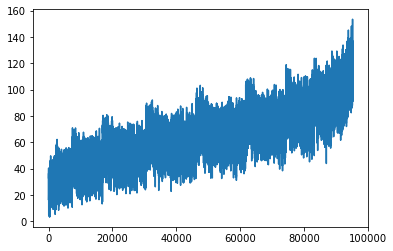

In [18]:
data.PHI.plot()


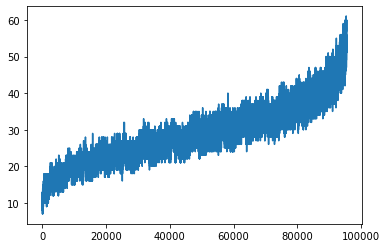

In [23]:
data.RHO.plot()

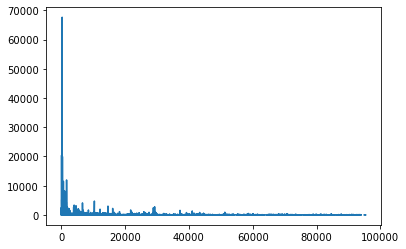

In [22]:
data.FRECUENC.plot()

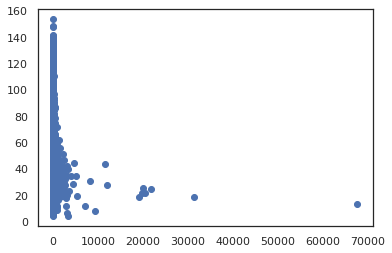

In [129]:
plt.scatter(data.FRECUENC,data.PHI) # (x=Freq,y=phi)

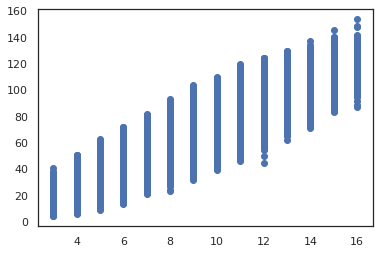

In [128]:
# (x=length,y=phi)
plt.scatter(data.LENGTH,data.PHI) 

(array([4.4100e+02, 4.7420e+03, 1.4795e+04, 2.5299e+04, 2.5647e+04,
        1.5843e+04, 6.5680e+03, 1.8040e+03, 2.3100e+02, 1.3000e+01]),
 array([  3.46605199,  18.46958756,  33.47312312,  48.47665868,
         63.48019425,  78.48372981,  93.48726537, 108.49080093,
        123.4943365 , 138.49787206, 153.50140762]),
 <a list of 10 Patch objects>)

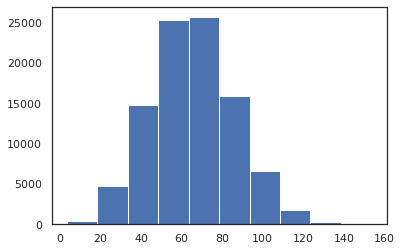

In [127]:
# (x=phi,y=length)
plt.hist(data.PHI) 

(array([  986.,  6270., 20481., 23644., 20571., 14386.,  5288.,  2771.,
          827.,   159.]),
 array([ 7. , 12.4, 17.8, 23.2, 28.6, 34. , 39.4, 44.8, 50.2, 55.6, 61. ]),
 <a list of 10 Patch objects>)

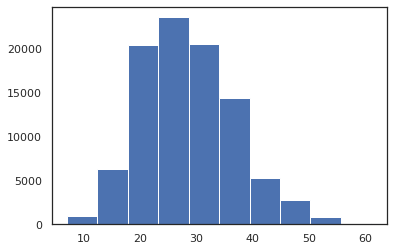

In [126]:
# (x=phi,y=length)
plt.hist(data.RHO) 

## Building the exercise calculator

Now that we have some basic stats, we can start creating filters, that will allow us to create diverse sets of exercises.

Each of this parameters, will define how we want each group of words to be.


In [23]:

high_phi = 100.0 # Higher than this will be consider High
low_phi  = 30.0  # Lower that this.
high_length = 6  # Longest words
low_length = 5  # Shortest words
high_rho = 35  # Longest words
low_rho = 25  # Shortest words

#freq = 1  # Word freqency needs to be more than this, 
high_freq = 50  # Word freqency needs to be more than this, to be "common"
low_freq = 0  # Word freqency needs to be less than this, to be "rare"

In [21]:
 
def filter_length(value,low_length=low_length,high_length=high_length ):
    """Keep (True) all words shorter than high and longer that low. in between."""
    #return True
    if value <= high_length and value >= low_length:
        return True
    else:
        return False


#example = data.loc[data['LENGTH'].apply(filter_length).fillna(False)]
#example

In [24]:
# Filter frequencies
def filter_freq(value, lf = low_freq, hf = high_freq):
    """Keep (True) words more frequent that freq.
    hf and lf = thresholds"""
    #return True
    if value >= lf and value <= hf:
        return True
    else:
        return False


#example = example.loc[example['FRECUENC'].apply(filter_length).fillna(False)]
#example

In [25]:
def filter_phi(value, low_phi=low_phi, high_phi=high_phi):
    """Keep all the words within the threshold"""
    if value < high_phi and value > low_phi:
        return True
    else:
        return False

#example_philtered = example.loc[example['PHI'].apply(filter_phi).fillna(False)]
#example_philtered

In [26]:
def filter_rho(value, low_rho=low_rho, high_rho=high_rho):
    """Keep all the words within the threshold"""
    if value < high_rho and value > low_rho:
        return True
    else:
        return False

#example_rhotered = example.loc[example['RHO'].apply(filter_rho).fillna(False)]
#example_rhotered

In [27]:
def filter_chars(value):
    """Keep only words we can use:
    - No ñ
    - No vowels on 1st char
    - No h on 1st char
    """
    if "ñ" in value or "h" in value[:1] or is_vowel(value[:1]):
        return False
    else:
        return True
    
def eq(v1, v2):
    """assert if equal or print result"""
    try:
        assert v1 == v2
    except AssertionError as e:
        print(v1,v2)

eq(filter_chars("barranco"), True)
eq(filter_chars("abaco"), False)
eq(filter_chars("coñejo"), False)
eq(filter_chars("habanero"), False)
eq(filter_chars("chíejo"), False)

True False


# Rules for creating groups of words 


Freq Column A == Freq Column B


#### Column A

Group A:

    Phi < 1/3PhiMax 
    Rho < 1/3RhoMax


Group B:

    Phi < 1/3PhiMax 
    Rho > 2/3RhoMax




#### Column B

Group C:

    Phi > 2/3PhiMax
    Rho < 1/3RhoMax

Group D:

    Phi > 2/3PhiMax
    Rho > 2/3RhoMax



In [29]:
# This is how the full original database looks like.

# All the words with more than 4000 points of frequency, are mostly nexus
data = data.loc[data["FRECUENC"].apply(lambda x: filter_freq(x,20,90))]
data.describe()

,RHO,PHI,LENGTH
count,3323.000000,3323.000000,3323.000000
mean,24.672585,55.039647,7.559133
std,7.790564,18.045137,2.299067
min,7.000000,12.259339,3.000000
25%,19.000000,41.750854,6.000000
50%,24.000000,53.648833,7.000000
75%,29.000000,66.620026,9.000000
max,60.000000,128.477907,16.000000


In [30]:
## TEMP. 

# taking a closer look at the data

# Between 5 and 6 characters long
min_l = 5
max_l = 6
words = data.loc[data["LENGTH"].apply(lambda x: filter_length(x,min_l,max_l))]
words = words.loc[words["PALABRA"].apply(filter_chars)]
words.describe()

,RHO,PHI,LENGTH
count,731.000000,731.000000,731.000000
mean,18.042408,40.094188,5.532148
std,2.331348,8.231764,0.499307
min,12.000000,13.792776,5.000000
25%,16.000000,34.593470,5.000000
50%,18.000000,40.248150,6.000000
75%,20.000000,46.077026,6.000000
max,26.000000,62.684146,6.000000


In [31]:
## Building the 1st group
#  Using filter_length, filter_phi, filter_freq, 

def build_word_group_a(dataset):
    """
    Build a word group given a set of parameters
        Group A:
        
        Length >= 5 and Length <= 6
        Phi < 1/3 PhiMax  ( < 30 )
        Rho < 1/2 RhoMax

    """
    # filter_length # Between 5 and 6 characters long
    min_l = 5
    max_l = 6
    #print(len(dataset))
    words = dataset.loc[dataset["LENGTH"].apply(lambda x: filter_length(x,min_l,max_l))]
    words = words.loc[words["PALABRA"].apply(filter_chars)]
    #print(len(words))
    # filter_phi
    lim_min_phi = words.PHI.min()
    alcanze = words.PHI.max() - words.PHI.min()
    lim_max_phi = (( alcanze / 3 ) * 1 ) + lim_min_phi # 1/3 of the difference between Phi Max and Phi Min
    wordsaphi = words.loc[words["PHI"].apply(lambda x: filter_phi(x,lim_min_phi,lim_max_phi) )]
    #print(len(wordsaphi))
    # filter_rho
    lim_min_rho = words.RHO.min()
    alcanze = words.RHO.max() - words.RHO.min()
    lim_max_rho = ( ( alcanze / 2 ) * 1 ) + lim_min_rho # 1/3 of the difference between Rho Max and Rho Min
    wordsrho = wordsaphi.loc[wordsaphi["RHO"].apply(lambda x: filter_rho(x,lim_min_rho,lim_max_rho) )]
    #print(len(wordsrho))
    return wordsrho

    
    
result = 0 
groupA = build_word_group_a(data)


groupA.describe()

,RHO,PHI,LENGTH
count,59.000000,59.000000,59.000000
mean,16.677966,26.184338,5.135593
std,1.151321,3.746134,0.345295
min,13.000000,16.304647,5.000000
25%,16.000000,24.261884,5.000000
50%,17.000000,27.753387,5.000000
75%,18.000000,29.053141,5.000000
max,18.000000,30.027312,6.000000


In [32]:
## Building the 2nd group
#  Using filter_length, filter_phi, filter_freq, 

def build_word_group_b(dataset):
    """
    Build a word group given a set of parameters

        Group B:

            Phi < 1/3PhiMax 
            Rho > 1/2 RhoMax


    """
    # filter_length # Between 5 and 6 characters long
    min_l = 5
    max_l = 6
    #print(len(dataset))
    words = dataset.loc[dataset["LENGTH"].apply(lambda x: filter_length(x,min_l,max_l))]
    words = words.loc[words["PALABRA"].apply(filter_chars)]
    #print(len(words))
    # filter_phi
    lim_min_phi = words.PHI.min()
    alcanze = words.PHI.max() - words.PHI.min()
    lim_max_phi = (( alcanze / 3 ) * 1 ) + lim_min_phi # Take 1/3 of the difference between Phi Max and Phi Min 
    wordsaphi = words.loc[words["PHI"].apply(lambda x: filter_phi(x,lim_min_phi,lim_max_phi) )]
    #print(len(wordsaphi))
    # filter_rho
    alcanze = words.RHO.max() - words.RHO.min()
    lim_min_rho = (( alcanze / 2 ) * 1 ) + words.RHO.min()
    lim_max_rho = 9999
    wordsrho = wordsaphi.loc[wordsaphi["RHO"].apply(lambda x: filter_rho(x,lim_min_rho,lim_max_rho) )]
    #print(len(wordsrho))
    return wordsrho

    
    
groupB = build_word_group_b(data)
groupB.describe()

,RHO,PHI,LENGTH
count,17.000000,17.000000,17.000000
mean,20.705882,26.394535,5.764706
std,0.985184,2.530183,0.437237
min,20.000000,22.404303,5.000000
25%,20.000000,24.597192,6.000000
50%,21.000000,26.768592,6.000000
75%,21.000000,28.336965,6.000000
max,24.000000,29.967886,6.000000


In [33]:
## Building the 3rd group, the 1st of the second column

def build_word_group_c(dataset):
    """
    Build a word group given a set of parameters
    
    Group C:

        Phi > 2/3 PhiMax
        Rho < 1/2 RhoMax


    """
    # filter_length # Between 5 and 6 characters long
    min_l = 5
    max_l = 6
    #print(len(dataset))
    words = dataset.loc[dataset["LENGTH"].apply(lambda x: filter_length(x,min_l,max_l))]
    words = words.loc[words["PALABRA"].apply(filter_chars)]
    #print(len(words))
    # filter_phi
    alcanze = words.PHI.max() - words.PHI.min()
    lim_min_phi = ((alcanze / 3 ) * 2 ) + words.PHI.min() # 2/3 of Phi Max
    lim_max_phi = 99999
    wordsaphi = words.loc[words["PHI"].apply(lambda x: filter_phi(x,lim_min_phi,lim_max_phi) )]
    #print(len(wordsaphi))
    # filter_rho
    lim_min_rho = 0
    alcanze = wordsaphi.RHO.max() - wordsaphi.RHO.min()
    lim_max_rho = ((( alcanze / 2 ) * 1 ) + wordsaphi.RHO.min() ) # 1/3 of Rho Max
    wordsrho = wordsaphi.loc[wordsaphi["RHO"].apply(lambda x: filter_rho(x,lim_min_rho,lim_max_rho) )]
    #print(len(wordsrho))
    return wordsrho

    
    
groupC = build_word_group_c(data)
groupC.describe()

,RHO,PHI,LENGTH
count,73.000000,73.000000,73.000000
mean,17.082192,51.229020,5.726027
std,1.063973,3.730509,0.449082
min,14.000000,46.507116,5.000000
25%,17.000000,48.547178,5.000000
50%,17.000000,50.071372,6.000000
75%,18.000000,53.455667,6.000000
max,18.000000,61.587942,6.000000


In [34]:
## Building the 4th group, the 2nd of the second column

def build_word_group_d(dataset):
    """
    Build a word group given a set of parameters
    
        Group D:

            Phi > 2/3PhiMax
            Rho > 1/2RhoMax



    """
    # filter_length # Between 5 and 6 characters long
    min_l = 5
    max_l = 6
    #print(len(dataset))
    words = dataset.loc[dataset["LENGTH"].apply(lambda x: filter_length(x,min_l,max_l))]
    words = words.loc[words["PALABRA"].apply(filter_chars)]
    #print(len(words))
    # filter_phi
    alcanze = words.PHI.max() - words.PHI.min()
    lim_min_phi = ((alcanze / 3 ) * 2 ) + words.PHI.min() # 2/3 of Phi Max
    lim_max_phi = 9999
    wordsaphi = words.loc[words["PHI"].apply(lambda x: filter_phi(x,lim_min_phi,lim_max_phi) )]
    #print(len(wordsaphi))
    # filter_rho
    alcanze = words.RHO.max() - words.RHO.min()
    lim_min_rho = (( alcanze / 2 ) * 1 ) + words.RHO.min() # 1/2 of Rho Max
    lim_max_rho = 9999
    wordsrho = wordsaphi.loc[wordsaphi["RHO"].apply(lambda x: filter_rho(x,lim_min_rho,lim_max_rho) )]
    #print(len(wordsrho))
    return wordsrho

    
    
groupD = build_word_group_d(data)
groupD.describe()

,RHO,PHI,LENGTH
count,60.000000,60.000000,60.0
mean,20.983333,49.880203,6.0
std,0.911167,3.072451,0.0
min,20.000000,46.388024,6.0
25%,20.000000,47.425192,6.0
50%,21.000000,49.094380,6.0
75%,22.000000,51.408943,6.0
max,23.000000,59.156507,6.0


Now, with all 4 groups separated, save each group on a separate file.
Create CSV and Excel files.

In [35]:
# Create csv and excel files.
for fmt in ["csv", "excel"]:
    ext = "xls" if fmt == "excel" else fmt # The file extension also changes depending on the format.
    for group in ["A","B","C","D"]:
        ## TODO: Use exec to create all the 8 files
        export_to_file = """group{group_name}.to_{fmt}("../data/grupo_{group_name}.{ext}", encoding="utf-8", index=False)"""
        exec(export_to_file.format(group_name=group, fmt=fmt, ext=ext))

In [ ]:
plt.scatter(chosen_words.FRECUENC,chosen_words.RHO)

In [ ]:
%%notify
dir(plt)

In [76]:
# Creating heatmaps in matplotlib is more difficult than it should be.
# Thankfully, Seaborn makes them easy for us.
# http://stanford.edu/~mwaskom/software/seaborn/

import seaborn as sns
sns.set(style='white')



In [ ]:
%%notify -o

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Phi vs Rho and friends')
sns.heatmap(data.T, mask=data.T.isnull(), annot=True, fmt='.0%');



In [ ]:
### EXPERIMENT
## Trying to plot multiple datasets, in one graph, 
## each with a different color.

import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

words.RHO
groupA
x = words.RHO
ys = words.PHI


#    print(x.size)
#    print(ys.size)
colors = itertools.cycle(["r", "b", "g"]) # iterating on 3 colors
# colors = cm.rainbow(np.linspace(0, 1, 4)) # create 5 or 6 colors
for y, c in zip(ys, colors):
    plt.scatter(x, ys, color=next(colors))

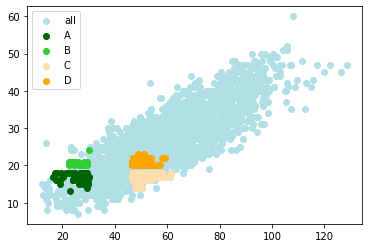

count     3323
unique      71
top         20
freq       150
Name: FRECUENC, dtype: int64

In [36]:
## plotting multiple datasets, in one graph, PHI vs RHO
## each with a different color.
## https://matplotlib.org/3.1.3/gallery/lines_bars_and_markers/scatter_with_legend.html#sphx-glr-gallery-lines-bars-and-markers-scatter-with-legend-py


import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

selection = 0
# remove words with too much frequency
selection = data.loc[data["FRECUENC"].apply(lambda x: filter_freq(x,0,15000))]


# see colors https://i.stack.imgur.com/lFZum.png 
plt.scatter(selection.PHI,selection.RHO, color = "powderblue", label="all")
plt.scatter(groupA.PHI,groupA.RHO, color = "darkgreen", label="A")
plt.scatter(groupB.PHI,groupB.RHO, color = "limegreen", label="B")
plt.scatter(groupC.PHI,groupC.RHO, color = "navajowhite", label="C")
plt.scatter(groupD.PHI,groupD.RHO, color = "orange", label="D")
plt.legend()
plt.show()

selection.FRECUENC.describe()

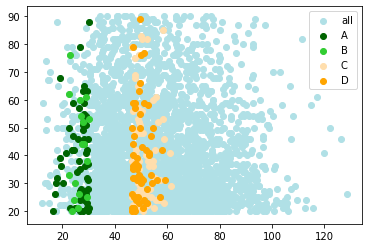

,RHO,PHI,LENGTH
count,3323.000000,3323.000000,3323.000000
mean,24.672585,55.039647,7.559133
std,7.790564,18.045137,2.299067
min,7.000000,12.259339,3.000000
25%,19.000000,41.750854,6.000000
50%,24.000000,53.648833,7.000000
75%,29.000000,66.620026,9.000000
max,60.000000,128.477907,16.000000


In [37]:
## plotting multiple datasets, PHI vs FRECUENCY

selection = 0
# remove words with too much frequency
selection = data.loc[data["FRECUENC"].apply(lambda x: filter_freq(x,20,90))]


# see colors https://i.stack.imgur.com/lFZum.png 
plt.scatter(selection.PHI,selection.FRECUENC, color = "powderblue", label="all")
plt.scatter(groupA.PHI,groupA.FRECUENC, color = "darkgreen", label="A")
plt.scatter(groupB.PHI,groupB.FRECUENC, color = "limegreen", label="B")
plt.scatter(groupC.PHI,groupC.FRECUENC, color = "navajowhite", label="C")
plt.scatter(groupD.PHI,groupD.FRECUENC, color = "orange", label="D")
plt.legend()
plt.show()

#selection.FRECUENC.describe()
selection.describe()

In [322]:
## EXPERIMENT
## Making the notebook interactive 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

medio = 0
def get_medio(x):
    global medio
    medio = x
    return x


rango = 0
def get_rango(x):
    global rango
    rango = x
    return x

print("Choose the median frequency")
interact(get_medio, x=(selection.FRECUENC.min(),selection.FRECUENC.max()))
print("Choose the range (over median and under median)")
interact(get_rango, x=(0,selection.FRECUENC.max()))



Choose the median frequency


interactive(children=(IntSlider(value=55, description='x', max=90, min=20), Output()), _dom_classes=('widget-i…

Choose the range (over median and under median)


interactive(children=(IntSlider(value=45, description='x', max=90), Output()), _dom_classes=('widget-interact'…

<function __main__.get_rango(x)>

### Using sliders to find groups of words based on Frequency

On the cell below, you can interactively use a couple of sliders,
to find words in all the groups with a frequency between certain range.

Execute the cell, and then move the sliders to the desired values.
Press `"Run Interact"` and you will see the plot updated.

In [363]:
### EXPERIMENT
## Trying to plot dynamically, based on pretty interactive sliders
## https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
## https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6


# create a dict with each group, and the colour it will be plotted in.
# see colors https://i.stack.imgur.com/lFZum.png 
graphs = {
    "A":"darkgreen",
    "B":"limegreen",
    "C":"navajowhite",
    "D":"orange",
}

@interact_manual(continuous_update=False)
def dothat(min_lim=(0,90),max_lim=(20,90)):
    selection = 0
    # remove words with too much frequency
    min_freq_tot = 20
    max_freq_tot = 90
    selection = data.loc[data["FRECUENC"].apply(lambda x: filter_freq(x,min_freq_tot,max_freq_tot))]
    plt.scatter(selection.PHI,selection.FRECUENC, color = "powderblue", label="all")
    print("min_lim",min_lim)
    print("max_lim",max_lim)
    for group, color in graphs.items():
        program = """
#print(dir())
#print(min_lim)
#print(max_lim)
## A lot of this shenanigans are due to exec issues with variable scope
done = False
def dox(x,min = min_lim, max=max_lim):
    global done
    if done == False:
        done = True
    return(filter_freq(x,min,max))
myindex = group{group}["FRECUENC"].apply(dox)
s{group} = group{group}.loc[myindex]
plt.scatter(s{group}.PHI,s{group}.FRECUENC, color = "{color}", label="{group}")
        """
        to_run = program.format(group=group,color=color)
        exec(to_run)
    plt.legend()
    plt.show()
    
    return plt



interactive(children=(IntSlider(value=45, description='min_lim', max=90), IntSlider(value=55, description='max…

In [368]:
#Showing groups (1 group, Pretty)
sA

,PALABRA,FRECUENC,RHO,PHI,LENGTH
2875,balón,44,16,28.299508,5
3075,botón,50,18,22.632764,5
3159,bulto,42,17,24.449647,5
3212,cajón,52,15,27.957117,5
3771,culto,59,15,28.220153,5
3898,digno,46,17,29.881568,5
3958,ducha,42,16,29.542898,5
4313,fruto,55,18,28.254849,5
4867,julio,57,15,26.415756,5
4869,junio,51,17,27.764312,5


In [371]:
### Show me the groups  (4 groups, UGLY)

#selection.FRECUENC.describe()
selection.describe()
print("""
                A and B""")
print(sA)
print(sB)

print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")

print("""
                C and D""")
print(sC)
print(sD)


                A and B
      PALABRA FRECUENC  RHO        PHI  LENGTH
2875    balón       44   16  28.299508       5
3075    botón       50   18  22.632764       5
3159    bulto       42   17  24.449647       5
3212    cajón       52   15  27.957117       5
3771    culto       59   15  28.220153       5
3898    digno       46   17  29.881568       5
3958    ducha       42   16  29.542898       5
4313    fruto       55   18  28.254849       5
4867    julio       57   15  26.415756       5
4869    junio       51   17  27.764312       5
4878    justa       41   17  28.906617       5
6063    pongo       54   18  29.079133       5
6136    pulso       42   16  23.881195       5
6308    revés       47   16  23.934619       5
6727    sutil       46   16  25.819212       5
6968    toque       49   17  27.783400       5
7196    vejez       41   18  21.394776       5
7236    vídeo       59   16  24.074121       5
10196  cónsul       42   18  23.778790       6
12730  léxico       46   17  28.395